In [4]:
from confidence_intervals import ci_bo
from botorch.test_functions import Ackley
import numpy as np
import matplotlib.pyplot as plt
from confidence_intervals import plot_acquisition_functions 
from confidence_intervals import compare_acquisition_functions

# Low dimension Ackley function tests
ucb_2, ucb_ci_2 = ci_bo(dim=2, acqf_type='qUCB', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Ackley(dim=2, negate=True), lower_bound=-32.176, upper_bound=32.176,super_seed=10)
ei_2, ei_ci_2 = ci_bo(dim=2, acqf_type='qEI', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Ackley(dim=2, negate=True), lower_bound=-32.176, upper_bound=32.176,super_seed=20)
pi_2, pi_ci_2 = ci_bo(dim=2, acqf_type='qPI', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Ackley(dim=2, negate=True), lower_bound=-32.176, upper_bound=32.176,super_seed=30)
compare_acquisition_functions(ucb_2, ucb_ci_2, ei_2, ei_ci_2, pi_2, pi_ci_2, filename='Ackley, dim=2')
plot_acquisition_functions(ucb_2, ucb_ci_2, ei_2, ei_ci_2, pi_2, pi_ci_2)

KeyboardInterrupt: 

/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)


  Comparison  Is_Greater  Superior
0   UCB > EI           0         0
1   UCB > PI           1         0
2   EI > UCB           1         0
3    EI > PI           1         0
4   PI > UCB           0         0
5    PI > EI           0         0


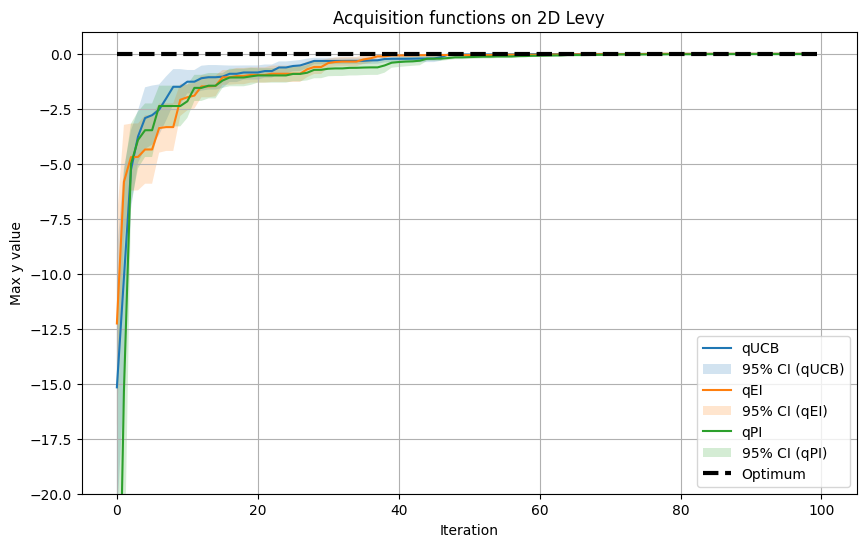

In [2]:
from confidence_intervals import ci_bo
from botorch.test_functions import Levy
import numpy as np
import matplotlib.pyplot as plt
from confidence_intervals import plot_acquisition_functions 
from confidence_intervals import compare_acquisition_functions

# Low dimension Levy function tests
ucb_2, ucb_ci_2 = ci_bo(dim=2, acqf_type='qUCB', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Levy, lower_bound=-10, upper_bound=10,super_seed=10)
ei_2, ei_ci_2 = ci_bo(dim=2, acqf_type='qEI', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Levy, lower_bound=-10, upper_bound=10,super_seed=20)
pi_2, pi_ci_2 = ci_bo(dim=2, acqf_type='qPI', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Levy, lower_bound=-10, upper_bound=10,super_seed=30)

compare_acquisition_functions(ucb_2, ucb_ci_2, ei_2, ei_ci_2, pi_2, pi_ci_2, filename='Levy, dim=2')
plot_acquisition_functions(ucb_2, ucb_ci_2, ei_2, ei_ci_2, pi_2, pi_ci_2, title='Acquisition functions on 2D Levy')


In [8]:
from botorch.test_functions import Beale

# Beale function tests
ucb_2, ucb_ci_2 = ci_bo(dim=2, acqf_type='qUCB', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Beale(negate=True), lower_bound=-4.5, upper_bound=4.5,super_seed=10)
ei_2, ei_ci_2 = ci_bo(dim=2, acqf_type='qEI', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Beale(negate=True), lower_bound=-4.5, upper_bound=4.5,super_seed=20)
pi_2, pi_ci_2 = ci_bo(dim=2, acqf_type='qPI', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Beale(negate=True), lower_bound=-4.5, upper_bound=4.5,super_seed=30)

compare_acquisition_functions(ucb_2, ucb_ci_2, ei_2, ei_ci_2, pi_2, pi_ci_2, filename='Beale, dim=2')

/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)
/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)


  Comparison  Is_Greater  Superior
0   UCB > EI           1         0
1   UCB > PI           1         0
2   EI > UCB           0         0
3    EI > PI           1         0
4   PI > UCB           0         0
5    PI > EI           0         0


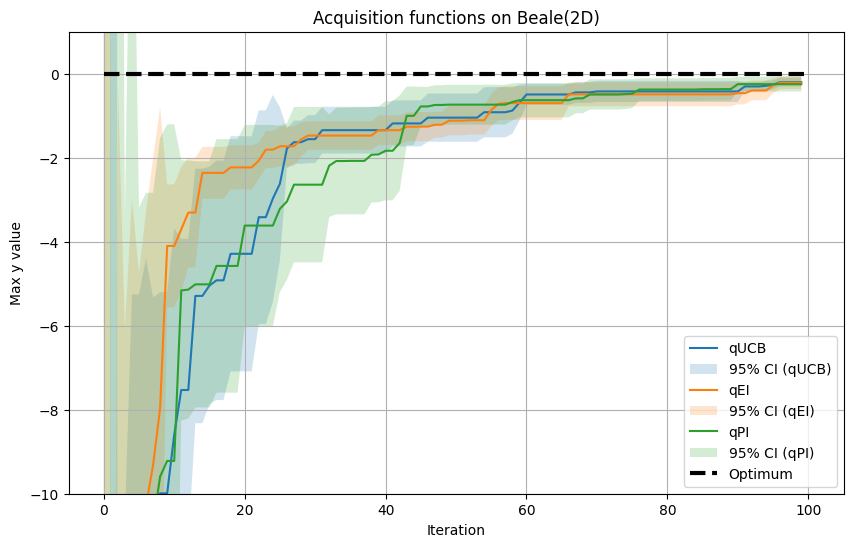

In [12]:
plt.figure(figsize=(10, 6))

# Plot qUCB
plt.plot(ucb_2, label='qUCB')
plt.fill_between(np.arange(len(ucb_2)), ucb_2 - ucb_ci_2, ucb_2 + ucb_ci_2, alpha=0.2, label='95% CI (qUCB)')

# Plot qEI
plt.plot(ei_2, label='qEI')
plt.fill_between(np.arange(len(ei_2)), ei_2 - ei_ci_2, ei_2 + ei_ci_2, alpha=0.2, label='95% CI (qEI)')

# Plot qPI
plt.plot(pi_2, label='qPI')
plt.fill_between(np.arange(len(pi_2)), pi_2 - pi_ci_2, pi_2 + pi_ci_2, alpha=0.2, label='95% CI (qPI)')

# Plot Optimum
plt.plot([0, len(ucb_2)], [0, 0], "k--", lw=3, label='Optimum')

plt.ylim([-10, 1])
plt.title('Acquisition functions on Beale(2D)')
plt.xlabel('Iteration')
plt.ylabel('Max y value')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from botorch.test_functions import DropWave

# Dropwave function tests
ucb_2, ucb_ci_2 = ci_bo(dim=2, acqf_type='qUCB', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=DropWave(negate=True), lower_bound=-5.12, upper_bound=5.12,super_seed=10)
ei_2, ei_ci_2 = ci_bo(dim=2, acqf_type='qEI', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=DropWave(negate=True), lower_bound=-5.12, upper_bound=5.12,super_seed=20)
pi_2, pi_ci_2 = ci_bo(dim=2, acqf_type='qPI', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=DropWave(negate=True), lower_bound=-5.12, upper_bound=5.12,super_seed=30)

compare_acquisition_functions(ucb_2, ucb_ci_2, ei_2, ei_ci_2, pi_2, pi_ci_2, filename='DropWave, dim=2')

/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/fit.py:102: OptimizationWarning: `scipy_minimize` terminated with status OptimizationStatus.FAILURE, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(
/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(
/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)
/Users/d

  Comparison  Is_Greater  Superior
0   UCB > EI           0         0
1   UCB > PI           0         0
2   EI > UCB           1         0
3    EI > PI           1         0
4   PI > UCB           1         0
5    PI > EI           0         0


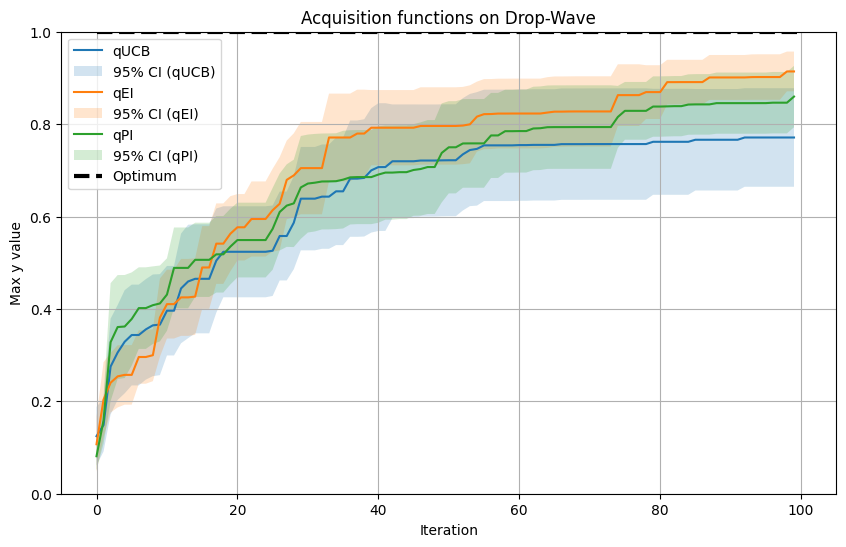

In [18]:
plt.figure(figsize=(10, 6))

# Plot qUCB
plt.plot(ucb_2, label='qUCB')
plt.fill_between(np.arange(len(ucb_2)), ucb_2 - ucb_ci_2, ucb_2 + ucb_ci_2, alpha=0.2, label='95% CI (qUCB)')

# Plot qEI
plt.plot(ei_2, label='qEI')
plt.fill_between(np.arange(len(ei_2)), ei_2 - ei_ci_2, ei_2 + ei_ci_2, alpha=0.2, label='95% CI (qEI)')

# Plot qPI
plt.plot(pi_2, label='qPI')
plt.fill_between(np.arange(len(pi_2)), pi_2 - pi_ci_2, pi_2 + pi_ci_2, alpha=0.2, label='95% CI (qPI)')

# Plot Optimum
plt.plot([0, len(ucb_2)], [1, 1], "k--", lw=3, label='Optimum')

plt.ylim([0, 1])
plt.title('Acquisition functions on Drop-Wave')
plt.xlabel('Iteration')
plt.ylabel('Max y value')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
from botorch.test_functions import Griewank

ucb_2, ucb_ci_2 = ci_bo(dim=2, acqf_type='qUCB', batch_size=5, epochs=15, n_init=25, N_TRIALS=1, function=Griewank(dim=2,negate=True), lower_bound=-600, upper_bound=600,super_seed=10)
ei_2, ei_ci_2 = ci_bo(dim=2, acqf_type='qEI', batch_size=5, epochs=15, n_init=25, N_TRIALS=1, function=Griewank(dim=2,negate=True), lower_bound=-600, upper_bound=600,super_seed=20)
pi_2, pi_ci_2 = ci_bo(dim=2, acqf_type='qPI', batch_size=5, epochs=15, n_init=25, N_TRIALS=1, function=Griewank(dim=2,negate=True), lower_bound=-600, upper_bound=600,super_seed=30)

compare_acquisition_functions(ucb_2, ucb_ci_2, ei_2, ei_ci_2, pi_2, pi_ci_2, filename='DixonPrice, dim=2')

/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/fit.py:102: OptimizationWarning: `scipy_minimize` terminated with status OptimizationStatus.FAILURE, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(
/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)
/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/botorch/optim/optimize.py:588: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.mi

  Comparison  Is_Greater  Superior
0   UCB > EI           1         0
1   UCB > PI           0         0
2   EI > UCB           0         0
3    EI > PI           0         0
4   PI > UCB           1         1
5    PI > EI           1         1


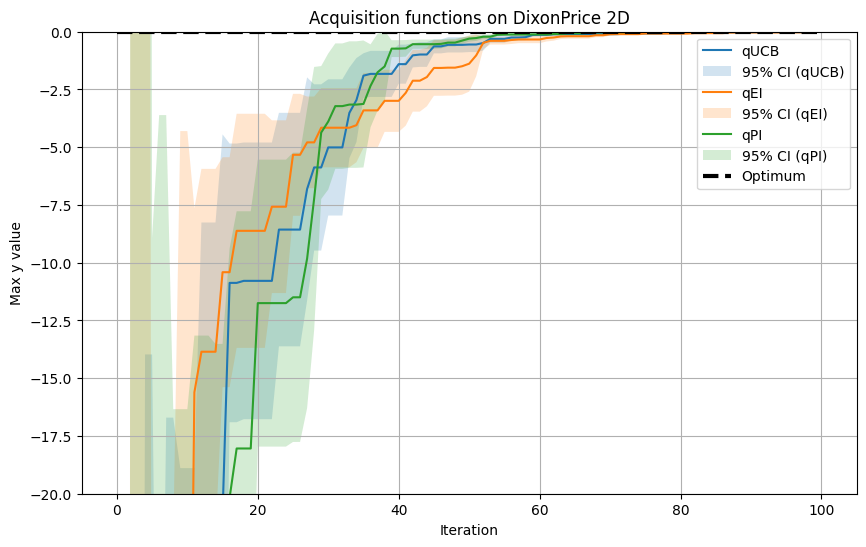

In [27]:
plt.figure(figsize=(10, 6))

# Plot qUCB
plt.plot(ucb_2, label='qUCB')
plt.fill_between(np.arange(len(ucb_2)), ucb_2 - ucb_ci_2, ucb_2 + ucb_ci_2, alpha=0.2, label='95% CI (qUCB)')

# Plot qEI
plt.plot(ei_2, label='qEI')
plt.fill_between(np.arange(len(ei_2)), ei_2 - ei_ci_2, ei_2 + ei_ci_2, alpha=0.2, label='95% CI (qEI)')

# Plot qPI
plt.plot(pi_2, label='qPI')
plt.fill_between(np.arange(len(pi_2)), pi_2 - pi_ci_2, pi_2 + pi_ci_2, alpha=0.2, label='95% CI (qPI)')

# Plot Optimum
plt.plot([0, len(ucb_2)], [0, 0], "k--", lw=3, label='Optimum')

plt.ylim([-20, 0])
plt.title('Acquisition functions on DixonPrice 2D')
plt.xlabel('Iteration')
plt.ylabel('Max y value')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
from botorch.test_functions import Cosine8

# Beale function tests
ucb_2, ucb_ci_2 = ci_bo(dim=8, acqf_type='qUCB', batch_size=5, epochs=15, n_init=25, N_TRIALS=1, function=Cosine8, lower_bound=-1, upper_bound=1,super_seed=10)
ei_2, ei_ci_2 = ci_bo(dim=8, acqf_type='qEI', batch_size=5, epochs=15, n_init=25, N_TRIALS=1, function=Cosine8, lower_bound=-1, upper_bound=1,super_seed=20)
pi_2, pi_ci_2 = ci_bo(dim=8, acqf_type='qPI', batch_size=5, epochs=15, n_init=25, N_TRIALS=1, function=Cosine8, lower_bound=-1, upper_bound=1,super_seed=30)

compare_acquisition_functions(ucb_2, ucb_ci_2, ei_2, ei_ci_2, pi_2, pi_ci_2, filename='Cosine8, dim=2')

AttributeError: type object 'Cosine8' has no attribute 'bounds'